In [1]:
from matplotlib import pyplot as plt
from statistics import mean
from statistics import stdev
from statistics import median
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.stats.sandwich_covariance as sw
import numpy as np
import statsmodels as statsmodels
import statsmodels.api as smf
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
import pandas as pd
# Reading in daily USD data
mfactor_xls = pd.ExcelFile('mfactordata.xlsx')

In [3]:
mfactor = mfactor_xls.parse('mfactor')
HF = mfactor_xls.parse('HF')

In [4]:
mfactor

,date1,date2,date3,FullCIRCoby5,FullCIRCoby20,FullVasiBFGS5,FullVasiBFGS20,Rf,MktRf,SMB,...,iBoxxBanks,TR01,TR13,TR35,TR57,TR710,SPBanks,HF,HFRf,DELTALIQ
0,201202,2012-02,2012-02-29,-0.048813,-0.048813,-0.039101,-0.039101,0.0000,0.0442,-0.0186,...,0.013209,-0.000100,-0.001417,-0.005348,-0.006973,-0.010269,0.058627,0.010031,0.010031,-0.000463
1,201203,2012-03,2012-03-31,-0.070293,-0.070293,-0.067558,-0.067558,0.0000,0.0311,-0.0066,...,0.006090,0.000129,-0.000603,-0.004323,-0.008905,-0.015787,0.083002,0.007390,0.007390,-0.000052
2,201204,2012-04,2012-04-30,0.070913,0.070913,0.066998,0.066998,0.0000,-0.0085,-0.0041,...,0.006269,0.000228,0.002142,0.008919,0.016816,0.025131,-0.006076,0.006909,0.006909,-0.000235
3,201205,2012-05,2012-05-31,0.155081,0.155081,0.158573,0.158573,0.0001,-0.0619,0.0009,...,-0.013463,-0.009799,-0.009550,-0.005428,0.004377,0.018876,-0.058010,0.002390,0.002290,-0.000200
4,201206,2012-06,2012-06-30,-0.026613,-0.020772,-0.032065,-0.032065,0.0000,0.0389,0.0064,...,0.012519,0.000012,-0.000530,-0.001324,-0.003038,-0.004053,0.032239,0.007575,0.007575,-0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,202108,2021-08,2021-08-31,0.003050,0.008930,-0.015014,-0.015014,0.0000,0.0291,-0.0046,...,-0.000727,0.000127,-0.000047,-0.001633,-0.002468,-0.002179,0.051722,0.002638,0.002638,0.000050
115,202109,2021-09,2021-09-30,0.026144,0.066832,-0.068537,-0.068537,0.0000,-0.0437,0.0075,...,-0.007008,0.000027,-0.001064,-0.005920,-0.012530,-0.017725,0.022544,-0.000077,-0.000077,-0.000012
116,202110,2021-10,2021-10-31,-0.041395,-0.061696,0.074084,0.074084,0.0000,0.0665,-0.0230,...,-0.003529,-0.000055,-0.003279,-0.007791,-0.008819,-0.004521,0.064260,-0.003091,-0.003091,0.000072
117,202111,2021-11,2021-11-30,-0.013864,-0.015744,0.010180,0.010180,0.0000,-0.0155,-0.0136,...,-0.000816,-0.000111,-0.000426,0.000847,0.006331,0.011016,-0.062953,-0.004638,-0.004638,0.000108


In [5]:
HF

,date,index,ret,cumret,retrf,cumretrf
0,2012-01-31,253.22,0.000000,1.000000,0.000000,1.000000
1,2012-02-29,255.76,0.010031,1.010031,0.010031,1.010031
2,2012-03-31,257.65,0.007390,1.017495,0.007390,1.017495
3,2012-04-30,259.43,0.006909,1.024524,0.006909,1.024524
4,2012-05-31,260.05,0.002390,1.026973,0.002290,1.026870
...,...,...,...,...,...,...
115,2021-08-31,391.48,0.002638,1.546007,0.002638,1.464383
116,2021-09-30,391.45,-0.000077,1.545889,-0.000077,1.464271
117,2021-10-31,390.24,-0.003091,1.541110,-0.003091,1.459745
118,2021-11-30,388.43,-0.004638,1.533963,-0.004638,1.452974


In [6]:
HF['ones'] = 1
HF['cumretrfperc'] = (HF['cumretrf'] - HF['ones'])*100
HF

,date,index,ret,cumret,retrf,cumretrf,ones,cumretrfperc
0,2012-01-31,253.22,0.000000,1.000000,0.000000,1.000000,1,0.000000
1,2012-02-29,255.76,0.010031,1.010031,0.010031,1.010031,1,1.003080
2,2012-03-31,257.65,0.007390,1.017495,0.007390,1.017495,1,1.749467
3,2012-04-30,259.43,0.006909,1.024524,0.006909,1.024524,1,2.452413
4,2012-05-31,260.05,0.002390,1.026973,0.002290,1.026870,1,2.687014
...,...,...,...,...,...,...,...,...
115,2021-08-31,391.48,0.002638,1.546007,0.002638,1.464383,1,46.438303
116,2021-09-30,391.45,-0.000077,1.545889,-0.000077,1.464271,1,46.427081
117,2021-10-31,390.24,-0.003091,1.541110,-0.003091,1.459745,1,45.974465
118,2021-11-30,388.43,-0.004638,1.533963,-0.004638,1.452974,1,45.297410


<AxesSubplot:ylabel='%'>

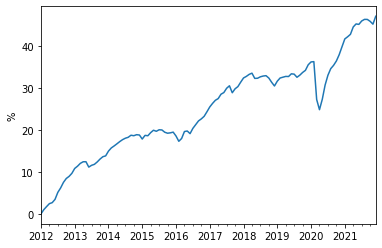

In [7]:
HF.plot(x='date',y='cumretrfperc',ylabel='%', xlabel='', legend=False) #.get_figure().savefig('HFcumuretrf.eps')

In [6]:
hf_hist = [ele*10000 for ele in HF['retrf']]

Text(0.5, 0, 'Basis points')

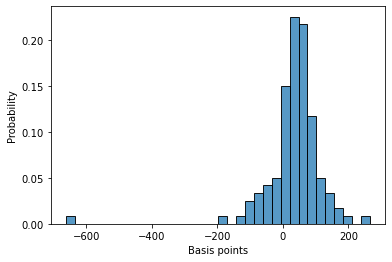

In [7]:
p = sns.histplot(data=hf_hist, stat='probability')
p.set_xlabel('Basis points')

In [8]:
p.figure.savefig('hfhist.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [15]:
import numpy as np
import scipy.stats
x = np.array(mfactor['HFRf'])
y = np.array(mfactor['FullVasiBFGS5'])
scipy.stats.pearsonr(x, y)   # Pearson's r

(-0.0627095445322654, 0.498071671227408)

In [18]:
mean(y) * 10000

18.216830400856438

In [19]:
1/10000

0.0001

**Multifactor regressions**

In [20]:
# Test statistics with HAC robust standard errors
#mkt_data = pd.DataFrame(full_ret_test, columns=['rets'])
#one = np.ones(len(monthly_mean_ret))
#mkt_data['one'] = 1
model = sm.ols( formula = 'FullCIRCoby5 ~ MktRf + SMB + HML + Momentum + SPBanks + iBoxxIND + iBoxxBanks + TR13 + TR35 + TR57 + TR710 + DELTALIQ',data = mfactor).fit(cov_type='HAC', cov_kwds={'maxlags': 1}, use_t=True)
#model = sm.ols( formula = 'rets ~ one',data = mkt_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FullCIRCoby5   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.010
Date:                Mon, 25 Jul 2022   Prob (F-statistic):             0.0301
Time:                        02:29:34   Log-Likelihood:                 177.50
No. Observations:                 119   AIC:                            -329.0
Df Residuals:                     106   BIC:                            -292.9
Df Model:                          12                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0047      0.008      0.569      0.571      -0.012       0.021
MktRf         -0.7673      0.288     -2.661      0.009      -1.339      -0.196
SMB            0.0373      0.208      0.179      0.858      -0.375       0.449
HML           -0.1150      0.305     -0.377      0.707      -0.719       0.489
Momentum      -0.1566      0.180     -0.869      0.387      -0.514       0.201
SPBanks        0.6190      0.182      3.407      0.001       0.259       0.979
iBoxxIND       0.1818      1.136      0.160      0.873      -2.070       2.434
iBoxxBanks    -1.0656      1.692     -0.630      0.530      -4.420       2.288
TR13           2.8598      3.517      0.813      0.418      -4.114       9.833
TR35         -12.9097      9.274     -1.392      0.167     -31.296       5.477
TR57          15.3919      8.878      1.734      0.086      -2.210      32.994
TR710         -5.0871      3.494     -1.456      0.148     -12.015       1.841
DELTALIQ      -4.5517      8.061     -0.565      0.573     -20.533      11.429
==============================================================================
Omnibus:                        4.747   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                6.148
Skew:                           0.117   Prob(JB):                       0.0462
Kurtosis:                       4.089   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
model.params[0] * 10000

NameError: name 'model' is not defined

**Credit Suisse Analysis**

In [50]:
len(x)

119

In [52]:
mfactor['one'] = 1

In [54]:
mfactor

,date1,date2,date3,FullCIRCoby5,FullCIRCoby20,FullVasiBFGS5,FullVasiBFGS20,Rf,MktRf,SMB,...,iBoxxBanks,TR01,TR13,TR35,TR57,TR710,SPBanks,HF,HFRf,one
0,201202,2012-02,2012-02-29,-0.048813,-0.048813,-0.039101,-0.039101,0.0000,0.0442,-0.0186,...,0.013209,-0.000100,-0.001417,-0.005348,-0.006973,-0.010269,0.058627,0.010031,0.010031,1
1,201203,2012-03,2012-03-31,-0.070293,-0.070293,-0.067558,-0.067558,0.0000,0.0311,-0.0066,...,0.006090,0.000129,-0.000603,-0.004323,-0.008905,-0.015787,0.083002,0.007390,0.007390,1
2,201204,2012-04,2012-04-30,0.070913,0.070913,0.066998,0.066998,0.0000,-0.0085,-0.0041,...,0.006269,0.000228,0.002142,0.008919,0.016816,0.025131,-0.006076,0.006909,0.006909,1
3,201205,2012-05,2012-05-31,0.155081,0.155081,0.158573,0.158573,0.0001,-0.0619,0.0009,...,-0.013463,-0.009799,-0.009550,-0.005428,0.004377,0.018876,-0.058010,0.002390,0.002290,1
4,201206,2012-06,2012-06-30,-0.026613,-0.020772,-0.032065,-0.032065,0.0000,0.0389,0.0064,...,0.012519,0.000012,-0.000530,-0.001324,-0.003038,-0.004053,0.032239,0.007575,0.007575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,202108,2021-08,2021-08-31,0.003050,0.008930,-0.015014,-0.015014,0.0000,0.0291,-0.0046,...,-0.000727,0.000127,-0.000047,-0.001633,-0.002468,-0.002179,0.051722,0.002638,0.002638,1
115,202109,2021-09,2021-09-30,0.026144,0.066832,-0.068537,-0.068537,0.0000,-0.0437,0.0075,...,-0.007008,0.000027,-0.001064,-0.005920,-0.012530,-0.017725,0.022544,-0.000077,-0.000077,1
116,202110,2021-10,2021-10-31,-0.041395,-0.061696,0.074084,0.074084,0.0000,0.0665,-0.0230,...,-0.003529,-0.000055,-0.003279,-0.007791,-0.008819,-0.004521,0.064260,-0.003091,-0.003091,1
117,202111,2021-11,2021-11-30,-0.013864,-0.015744,0.010180,0.010180,0.0000,-0.0155,-0.0136,...,-0.000816,-0.000111,-0.000426,0.000847,0.006331,0.011016,-0.062953,-0.004638,-0.004638,1


In [55]:
# Test statistics with HAC robust standard errors
#mkt_data = pd.DataFrame(full_ret_test, columns=['rets'])
#one = np.ones(len(monthly_mean_ret))
#mkt_data['one'] = 1
model = sm.ols( formula = 'HFRf ~ one',data = mfactor).fit(cov_type='HAC', cov_kwds={'maxlags': 1}, use_t=True)
#model = sm.ols( formula = 'rets ~ one',data = mkt_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HFRf   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           0.000924
Time:                        00:04:10   Log-Likelihood:                 389.89
No. Observations:                 119   AIC:                            -777.8
Df Residuals:                     118   BIC:                            -775.0
Df Model:                           0                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0016      0.000      3.399      0.001       0.001       0.003
one            0.0016      0.000      3.399      0.001       0.001       0.003
==============================================================================
Omnibus:                      132.434   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3763.558
Skew:                          -3.700   Prob(JB):                         0.00
Kurtosis:                      29.538   Cond. No.                     6.73e+15
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
[2] The smallest eigenvalue is 5.25e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
bpsmult = 10000

In [72]:
mean(x) * bpsmult

32.96053646097069

In [73]:
median(x) * bpsmult

41.012698162315694

In [58]:
skew(x)

-3.700013185381964

In [59]:
kurtosis(x)

26.53820783571262

In [61]:
model.bse[0]

0.00048490293928648876

In [78]:
model.bse

Intercept    0.000485
one          0.000485
dtype: float64

In [62]:
mean(x) / model.bse[0]

6.797347219522019

In [76]:
stdev(x) * bpsmult

91.76197942780139

In [77]:
stdev(x) * np.sqrt(12) * bpsmult

317.8728211440842

In [65]:
mean(x)/stdev(x)

0.3591960054316847

In [66]:
sum(1 for i in x if i < 0)/len(x)

0.2184873949579832

In [74]:
min(x) * bpsmult

-662.9965635738833

In [75]:
max(x) * bpsmult

266.1407999529795

In [69]:
stats.ttest_1samp(x, popmean=0, axis=None)

Ttest_1sampResult(statistic=3.918365815981374, pvalue=0.00014991293227202695)

In [70]:
from statsmodels.tsa import stattools
# x = 1-D array
# Yield normalized autocorrelation function of number lags
autocorr = stattools.acf(x)

# Get autocorrelation coefficient at lag = 1
autocorr_coeff = autocorr[1]
autocorr_coeff

C:\Users\Miro_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Miro_\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


0.340466588316118

In [84]:
xls_flip = pd.ExcelFile('flipdataa.xlsx')

# Parsing daily data: ICE LIBOR rates / ICE swap rates / Tullett Prebon OIS rates
flip = xls_flip.parse('Sheet1')

In [85]:
flip

,Timestamp,"Mid Yield Close, 10Y","Mid Yield Close, 1Y"
0,2022-01-31,1.78290,0.77755
1,2021-12-31,1.51095,0.37870
2,2021-11-30,1.45450,0.22340
3,2021-10-31,1.55915,0.12175
4,2021-09-30,1.49165,0.07480
...,...,...,...
236,2002-05-31,5.04355,NaN
237,2002-04-30,5.08800,NaN
238,2002-03-31,5.40465,NaN
239,2002-02-28,4.87170,NaN


In [86]:
# Reversing the order of rows and dropping rows with nan-values
flip = flip.reindex(index=flip.index[::-1]).reset_index(drop=True)
#flip.to_excel('flipattu.xlsx')

In [88]:
flip.to_excel('flipattu2.xlsx')